# Transshipment Problem using Python Pulp

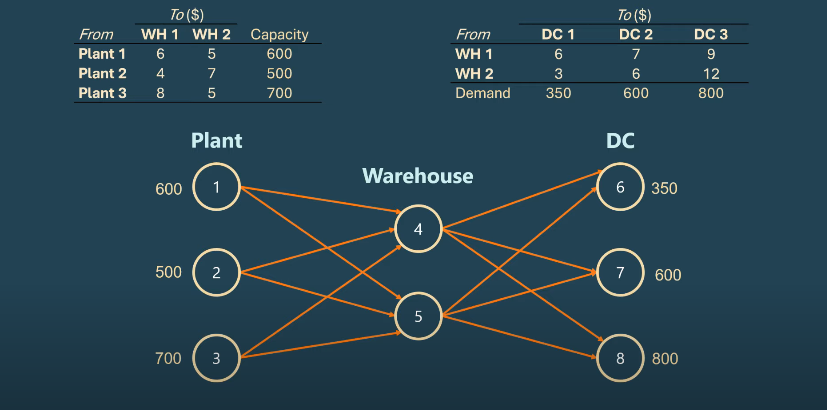

### Mathematical Formulation  
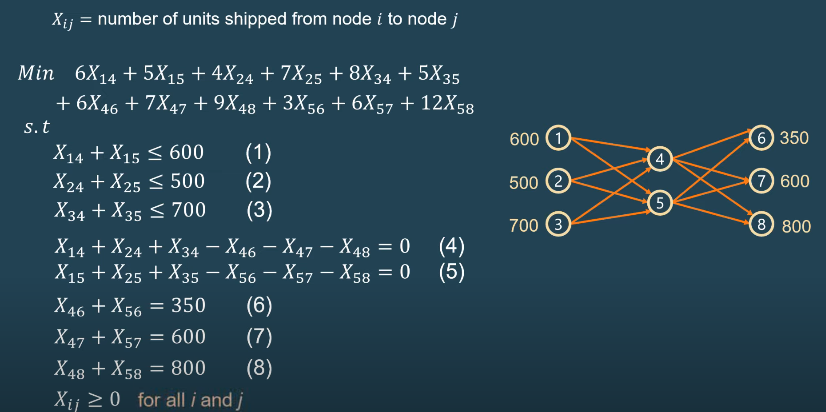

In [1]:
#taking inputs
s, w, d = map(int, input("Enter number of sources, transshipment nodes, destinations: ").split())

supply = list(map(int, input("Enter supply: ").split()))
demand = list(map(int, input("Enter demand: ").split()))
total_supply = sum(supply)
total_demand = sum(demand)

print(f"Enter Source → Warehouse cost matrix ({s}x{w}):")
cost_sw = [list(map(int, input().split())) for _ in range(s)]

print(f"Enter Warehouse → Destination cost matrix ({w}x{d}):")
cost_wd = [list(map(int, input().split())) for _ in range(w)]

from pulp import LpProblem, LpMinimize, LpVariable, lpSum, value, LpStatus
model = LpProblem("Transshipment_Problem", LpMinimize)

#create decision variables
x_sw = [[LpVariable(f"x_s{i}_w{j}", lowBound=0) for j in range(w)] for i in range(s)]
x_wd = [[LpVariable(f"x_w{i}_d{j}", lowBound=0) for j in range(d)] for i in range(w)]

#create objhective function
model += (
    lpSum(cost_sw[i][j]*x_sw[i][j] for j in range(w) for i in range(s)) +
    lpSum(cost_wd[i][j]*x_wd[i][j] for j in range(d) for i in range(w))
)
# supply constraints
for i in range(s):
    if total_supply > total_demand:
        model += lpSum(x_sw[i][j] for j in range(w)) <= supply[i], f"Supply_S{i+1}"
    else:
        model += lpSum(x_sw[i][j] for j in range(w)) == supply[i], f"Supply_S{i+1}"
#demand constraints
for j in range(d):
    if total_demand > total_supply:
        model += lpSum(x_wd[i][j] for i in range(w)) <= demand[j], f"Demand_D{j+1}"
    else:
        model += lpSum(x_wd[i][j] for i in range(w)) == demand[j], f"Demand_D{j+1}"

#warehouse constraints(flow conservation)
for j in range(w):
    inflow = lpSum(x_sw[i][j] for i in range(s))
    outflow = lpSum(x_wd[j][k] for k in range(d))
    model += inflow == outflow, f"Warehouse_W{j+1}"

model.solve()
print("Status:", LpStatus[model.status])
print("Minimum Total Cost:", value(model.objective))

for i in range(s):
    for j in range(w):
        val = x_sw[i][j].value()
        if val > 0:
            print(f"Source S{i+1} → Warehouse W{j+1}: {val} units")

for j in range(w):
    for k in range(d):
        val = x_wd[j][k].value()
        if val > 0:
            print(f"Warehouse W{j+1} → Destination D{k+1}: {val} units")

Enter number of sources, transshipment nodes, destinations:  3 2 3
Enter supply:  600 500 700
Enter demand:  350 600 800


Enter Source → Warehouse cost matrix (3x2):


 6 5
 4 7
 8 5


Enter Warehouse → Destination cost matrix (2x3):


 6 7 9
 3 6 12


Status: Optimal
Minimum Total Cost: 20400.0
Source S1 → Warehouse W1: 300.0 units
Source S1 → Warehouse W2: 250.0 units
Source S2 → Warehouse W1: 500.0 units
Source S3 → Warehouse W2: 700.0 units
Warehouse W1 → Destination D3: 800.0 units
Warehouse W2 → Destination D1: 350.0 units
Warehouse W2 → Destination D2: 600.0 units
